## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.utils import check_random_state
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
%run ..//Library//SVRLSPercent_Library.ipynb 

## Score Functions

In [5]:
def mape_score(y_real, y_predict):
    return np.mean(np.abs((y_real - y_predict)/y_real))*100

In [6]:
def rmspe_score(y_real, y_predict):
    return np.sqrt(np.mean(np.square(( y_real - y_predict)/y_real)))*100

## Load data

In [7]:
boston = load_boston()

# Initializing the dataframe
data = pd.DataFrame(boston.data)

#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 

In [9]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [10]:
# Matrix obtained with symbolic transformation
# X = pd.read_csv("newBoston.csv")

In [11]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
y_train = y_train.to_numpy(); y_test = y_test.to_numpy()

In [12]:
# Standarize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## fit

In [16]:
model = SVR_PerLs(C = 16962.540770, gamma = 0.050967, kernel = "rbf").fit(X_train, y_train)

## Predict

In [17]:
predict = model.predict(X_train)
forecast = model.predict(X_test)

In [18]:
print(f"MAPE: {mape_score(y_test, forecast)}")
print(f"RMSPE: {rmspe_score(y_test, forecast)}")
print(f"R2: {metrics.r2_score(y_test, forecast)}")
print(f"MSE: {metrics.mean_squared_error(y_test, forecast)}")

MAPE: 10.057220703069838
RMSPE: 17.833996423244795
R2: 0.89590248106335
MSE: 10.86987045172686


In [23]:
mapscortrain = mape_score(y_train, predict)
mapscortest = mape_score(y_test, forecast)
rmspetrain = rmspe_score(y_train, predict)
rmspetest = rmspe_score(y_test, forecast)
print(f"MAPE train score: {mapscortrain:.3},\nMAPE test score: {mapscortest:.3}")
print(f"RMSPE train score: {rmspetrain:.6},\nRMSPE test score: {rmspetest:.6}")

MAPE train score: 5.92,
MAPE test score: 10.1
RMSPE train score: 8.65424,
RMSPE test score: 17.834


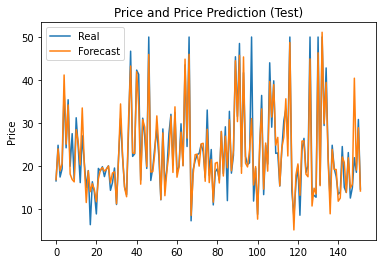

In [34]:
plt.title("Price and Price Prediction (Test)")
plt.plot(y_test, label = "Real")
plt.plot(forecast, label = "Forecast")
plt.ylabel("Price")
plt.legend();

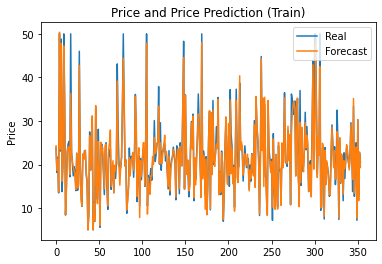

In [35]:
plt.title("Price and Price Prediction (Train)")
plt.plot(y_train, label = "Real")
plt.plot(predict, label = "Forecast")
plt.ylabel("Price")
plt.legend();